<div style="background-color:#e6f2ff; padding:20px; border-radius:10px;">
<img style="float:left; margin-right:20px;" src='alinco.png' width="120"/>
<h1 style="color:#000047;">Actividad 1: Extracción de datos de diferentes fuentes</h1>
<br style="clear:both"/>
</div>

<div style="border-left:4px solid #000047; padding:10px; margin-top:10px; background:#f5f5f5;">
<b>Objetivo:</b> Practicar la extracción, análisis y manipulación de datos provenientes de archivos JSON, XML, CSV e imágenes usando Python.
</div>

<div style="margin-top:10px;">
<b>Instrucciones generales:</b>
<ul>
<li>Lee cuidadosamente cada sección y realiza los ejercicios propuestos.</li>
<li>Utiliza <b>pandas</b> para manipulación de datos tabulares, <b>json</b> y <b>xml.etree.ElementTree</b> para extracción de datos, y <b>matplotlib</b> o <b>opencv</b> para imágenes.</li>
<li>Responde cada pregunta con código y, cuando sea necesario, justifica tu respuesta.</li>
</ul>
</div>

## 1️⃣ JSON: Información de empleados

Supón que tienes el archivo <code>empleados.json</code> con la siguiente estructura:

```json
[
  {"nombre": "Ana", "edad": 28, "departamento": "Ventas", "salario": 2500},
  {"nombre": "Luis", "edad": 35, "departamento": "IT", "salario": 3200},
  {"nombre": "María", "edad": 24, "departamento": "Ventas", "salario": 2300},
  {"nombre": "Carlos", "edad": 40, "departamento": "IT", "salario": 4000}
]
```

<b>Ejercicios:</b>

1. Crea un DataFrame a partir de la extracción de información de este archivo JSON.
2. ¿Cuál es el <b>salario promedio por departamento</b>?
3. ¿Quién es el <b>empleado más joven</b> y a qué departamento pertenece?
4. ¿Cuántos empleados tienen un <b>salario mayor a 2500</b>?
5. ¿Cuál es la <b>diferencia de edad</b> entre el empleado más joven y el de mayor edad?
6. ¿Cuál es el <b>salario total pagado</b> en la empresa?

<i>Tip: Usa pandas.read_json o json.load para cargar los datos.</i>

In [1]:
# Tu código aquí
import pandas as pd
import json
#cargar el archivo 
df=pd.read_json("empleados.json")
#imprimir data
print("dataSet")
print(df)
salario_promedio = df.groupby("departamento")["salario"].mean()
print("\nSalario promedio por departamento:")
print(salario_promedio)


empleado_joven = df.loc[df["edad"].idxmin()]
print(f"\nEmpleado más joven: {empleado_joven['nombre']}, "
      f"Departamento: {empleado_joven['departamento']}, "
      f"Edad: {empleado_joven['edad']}")

mayores_2500 = df[df["salario"] > 2500].shape[0]
print(f"\nNúmero de empleados con salario mayor a 2500: {mayores_2500}")


diferencia_edad = df["edad"].max() - df["edad"].min()
print(f"\nDiferencia de edad: {diferencia_edad} años")


salario_total = df["salario"].sum()
print(f"\nSalario total pagado: {salario_total}")

dataSet
   nombre  edad departamento  salario
0     Ana    28       Ventas     2500
1    Luis    35           IT     3200
2   María    24       Ventas     2300
3  Carlos    40           IT     4000

Salario promedio por departamento:
departamento
IT        3600.0
Ventas    2400.0
Name: salario, dtype: float64

Empleado más joven: María, Departamento: Ventas, Edad: 24

Número de empleados con salario mayor a 2500: 2

Diferencia de edad: 16 años

Salario total pagado: 12000


## 2️⃣ XML: Catálogo de libros

Supón que tienes el archivo <code>libros.xml</code> con la siguiente estructura:

```xml
<libros>
  <libro>
    <titulo>Python para Todos</titulo>
    <autor>Juan Pérez</autor>
    <precio>29.99</precio>
    <anio>2020</anio>
  </libro>
  <libro>
    <titulo>Data Science Avanzado</titulo>
    <autor>María López</autor>
    <precio>45.50</precio>
    <anio>2022</anio>
  </libro>
  <libro>
    <titulo>Ingeniería de Características</titulo>
    <autor>Pedro Ruiz</autor>
    <precio>39.00</precio>
    <anio>2019</anio>
  </libro>
</libros>
```

<b>Ejercicios:</b>

1. Crea un DataFrame a partir de la extracción de información de este archivo XML.
2. ¿Cuál es el <b>libro más caro</b> y su autor?
3. ¿Cuál es el <b>precio promedio</b> de los libros publicados después de 2020?
4. ¿Cuántos libros fueron <b>publicados antes de 2021</b>?
5. ¿Cuál es la <b>diferencia de precio</b> entre el libro más barato y el más caro?
6. ¿Cuántos <b>autores diferentes</b> hay en la lista?

<i>Tip: Usa xml.etree.ElementTree para leer el archivo y pandas para tabular los datos.</i>

In [4]:
# Tu código aquí
import xml.etree.ElementTree as ET
import pandas as pd

# 1 Leer el archivo XML
tree = ET.parse("libros.xml")
root = tree.getroot()

# 2️ Extraer la información de cada libro
libros = []
for libro in root.findall("libro"):
    titulo = libro.find("titulo").text
    autor = libro.find("autor").text
    precio = float(libro.find("precio").text)
    anio = int(libro.find("anio").text)
    libros.append({"titulo": titulo, "autor": autor, "precio": precio, "anio": anio})

# 3️ Crear el DataFrame
df = pd.DataFrame(libros)
print("DataFrame de libros:")
print(df)

# 4️ Libro más caro y su autor
libro_caro = df.loc[df["precio"].idxmax()]
print(f"\nEl libro más caro es '{libro_caro['titulo']}' de {libro_caro['autor']} "
      f"con un precio de ${libro_caro['precio']}")

# 5️ Precio promedio de los libros publicados después de 2020
promedio_post_2020 = df[df["anio"] > 2020]["precio"].mean()
print(f"\n recio promedio de libros publicados después de 2020: ${promedio_post_2020:.2f}")

# 6️ Número de libros publicados antes de 2021
antes_2021 = df[df["anio"] < 2021].shape[0]
print(f"\nLibros publicados antes de 2021: {antes_2021}")

# 7️ Diferencia de precio entre el más barato y el más caro
diferencia_precio = df["precio"].max() - df["precio"].min()
print(f"\nDiferencia de precio entre el más barato y el más caro: ${diferencia_precio:.2f}")

# 8️ Número de autores diferentes
autores_unicos = df["autor"].nunique()
print(f"\nAutores diferentes en la lista: {autores_unicos}")

DataFrame de libros:
                          titulo        autor  precio  anio
0              Python para Todos   Juan Pérez   29.99  2020
1          Data Science Avanzado  María López   45.50  2022
2  Ingeniería de Características   Pedro Ruiz   39.00  2019

El libro más caro es 'Data Science Avanzado' de María López con un precio de $45.5

 recio promedio de libros publicados después de 2020: $45.50

Libros publicados antes de 2021: 2

Diferencia de precio entre el más barato y el más caro: $15.51

Autores diferentes en la lista: 3


## 3️⃣ CSV: Ventas detalladas

Supón que tienes el archivo <code>ventas_detalladas.csv</code> con la siguiente estructura:

```csv
producto,fecha,cantidad,precio_unitario
A,2023-01-01,10,2.5
B,2023-01-02,5,3.0
A,2023-01-03,7,2.5
C,2023-01-01,3,4.0
B,2023-01-03,2,3.0
```

<b>Ejercicios:</b>

1. Crea un DataFrame con los datos extraídos del archivo.
2. ¿Cuál es el <b>total vendido</b> por producto y por fecha?
3. ¿En qué fecha se vendió la <b>mayor cantidad de productos</b>?
4. ¿Cuál es el <b>producto con mayor ingreso total</b>?
5. ¿Cuál es la <b>media de cantidad vendida</b> por producto?
6. ¿Qué producto tuvo <b>ventas todos los días registrados</b>?

<i>Tip: Usa pandas.read_csv y agrupa los datos según lo que se pide.</i>

In [8]:
# Tu código aquí
import pandas as pd

# 1️ Leer el archivo CSV
df = pd.read_csv("ventas_detalladas.csv")

print(" DataFrame original:")
print(df)

# Agregar una columna con el ingreso total de cada venta
df["ingreso"] = df["cantidad"] * df["precio_unitario"]

# 2️ Total vendido por producto y por fecha
total_por_producto_fecha = df.groupby(["producto", "fecha"])["ingreso"].sum()
print("\n Total vendido por producto y por fecha:")
print(total_por_producto_fecha)

# 3️ Fecha con la mayor cantidad total de productos vendidos
fecha_mas_ventas = df.groupby("fecha")["cantidad"].sum().idxmax()
print(f"\n Fecha con mayor cantidad de productos vendidos: {fecha_mas_ventas}")

# 4️ Producto con mayor ingreso total
producto_mayor_ingreso = df.groupby("producto")["ingreso"].sum().idxmax()
print(f"\n Producto con mayor ingreso total: {producto_mayor_ingreso}")

# 5️ Media de cantidad vendida por producto
media_por_producto = df.groupby("producto")["cantidad"].mean()
print("\n📈 Media de cantidad vendida por producto:")
print(media_por_producto)

# 6️ Producto que tuvo ventas todos los días registrados
# Primero, contamos cuántos días hay en total:
total_dias = df["fecha"].nunique()

# Luego, cuántos días aparece cada producto:
dias_por_producto = df.groupby("producto")["fecha"].nunique()

producto_todos_dias = dias_por_producto[dias_por_producto == total_dias].index.tolist()

if producto_todos_dias:
    print(f"\n Producto(s) con ventas todos los días registrados: {', '.join(producto_todos_dias)}")
else:
    print("\n Ningún producto tuvo ventas todos los días registrados.")

 DataFrame original:
   Unnamed: 0 producto       fecha  cantidad  precio_unitario
0           0        A  2023-01-01        10              2.5
1           1        B  2023-01-02         5              3.0
2           2        A  2023-01-03         7              2.5
3           3        C  2023-01-01         3              4.0
4           4        B  2023-01-03         2              3.0

 Total vendido por producto y por fecha:
producto  fecha     
A         2023-01-01    25.0
          2023-01-03    17.5
B         2023-01-02    15.0
          2023-01-03     6.0
C         2023-01-01    12.0
Name: ingreso, dtype: float64

 Fecha con mayor cantidad de productos vendidos: 2023-01-01

 Producto con mayor ingreso total: A

📈 Media de cantidad vendida por producto:
producto
A    8.5
B    3.5
C    3.0
Name: cantidad, dtype: float64

 Ningún producto tuvo ventas todos los días registrados.


## 4️⃣ Imágenes: Análisis de pixeles

Supón que tienes la imagen <code>alinco.png</code> en la misma carpeta que este notebook.

<b>Ejercicios:</b>

1. Extrae la información de los pixeles de la imagen y muestra sus dimensiones.
2. ¿Cuál es el <b>valor RGB</b> del píxel (50, 50)?
3. ¿Cuál es el <b>color predominante</b> en la imagen?

<i>Tip: Usa matplotlib.pyplot.imread o cv2.imread para cargar la imagen y numpy para analizar los datos.</i>

📏 Dimensiones de la imagen: (110, 120, 4)


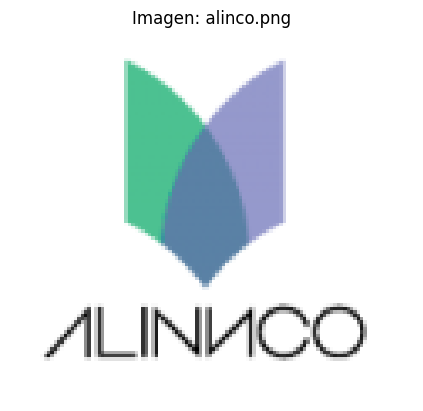

 Valor RGB del píxel (50, 50): [0.34901962 0.5019608  0.64705884 1.        ]
 Color predominante (RGB): (np.int64(0), np.int64(0), np.int64(0), np.int64(0))


In [ ]:
# Tu código aquí
import matplotlib.pyplot as plt
import numpy as np

# 1️ Cargar la imagen con matplotlib
imagen = plt.imread("alinco.png")

# 2️ Mostrar información básica
print("Dimensiones de la imagen:", imagen.shape)

# 3️ Mostrar la imagen
plt.imshow(imagen)
plt.title("Imagen: alinco.png")
plt.axis("off")
plt.show()

# 4️ Valor RGB del píxel (50, 50)
# Recordemos: (fila, columna) = (y, x)
pixel_50_50 = imagen[50, 50]
print(f" Valor RGB del píxel (50, 50): {pixel_50_50}")

# 5️ Encontrar el color predominante
# Convertimos la matriz 3D en una lista de todos los píxeles (filas × columnas, 3 canales)
pixeles = imagen.reshape(-1, imagen.shape[-1])

# Convertimos a enteros si la imagen tiene valores entre 0–1
pixeles_int = (pixeles * 255).astype(int)

# Convertimos los píxeles a tuplas (R,G,B) para contarlos
from collections import Counter
conteo_colores = Counter([tuple(color) for color in pixeles_int])

# Obtenemos el color más frecuente
color_predominante = conteo_colores.most_common(1)[0][0]

print(f" Color predominante (RGB): {color_predominante}")